In [6]:
import pandas as pd
housing_data = pd.read_csv('Bengaluru_House_Data.csv')



In [7]:
housing_data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [8]:
print(housing_data.info())
print(housing_data.describe())
print(housing_data.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB
None
               bath       balcony         price
count  13247.000000  12711.000000  13320.000000
mean       2.692610      1.584376    112.565627
std        1.341458      0.817263    148.971674
min        1.000000      0.000000      8.000000
25%        2.000000      1.000000     50.000000
50%        2.000000      2.000000     72.000000
75%        3.000000     

In [9]:
# Drop rows with missing values
housing_data = housing_data.dropna()

# Or impute missing values
# housing_data.fillna(value, inplace=True)


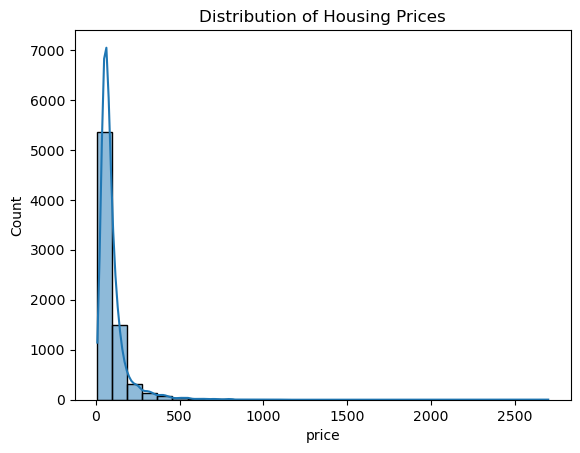

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example: Visualizing the distribution of housing prices
sns.histplot(housing_data['price'], bins=30, kde=True)
plt.title('Distribution of Housing Prices')
plt.show()


In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# Instantiate the SVM Regressor
svr = SVR(kernel='linear')

# Fit the model to the training data
svr.fit(X_train, y_train)

# Make predictions on the test set
predictions = svr.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

In [ ]:
from sklearn.model_selection import GridSearchCV

# Example: GridSearchCV for hyperparameter tuning
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1]}
grid_search = GridSearchCV(SVR(kernel='linear'), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Best parameters
best_params = grid_search.best_params_
print(f'Best Hyperparameters: {best_params}')

# Use the best model for predictions
best_svr = grid_search.best_estimator_
predictions = best_svr.predict(X_test)
